In [1]:
%reload_ext autoreload
%autoreload 2
from ripple_heterogeneity.utils import loading,functions,add_new_deep_sup
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
cell_metrics = loading.load_all_cell_metrics(df.basepath)

In [3]:
cell_metrics = add_new_deep_sup.deep_sup_from_deepSuperficialDistance(cell_metrics)


In [4]:
keep_idx = (cell_metrics.putativeCellType.str.contains('Pyramidal') &
            cell_metrics.brainRegion.str.contains('CA1') &
            (cell_metrics.bad_unit == False) &
            (cell_metrics.spikeCount > 100))
cell_metrics = cell_metrics[keep_idx]

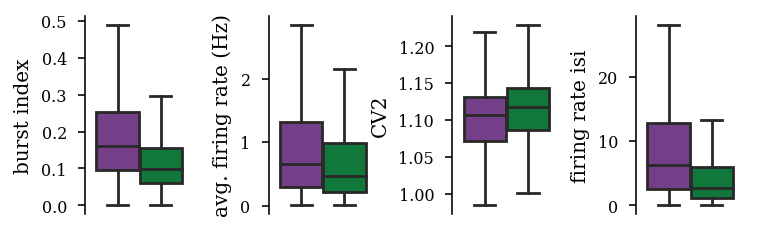

In [11]:
vars = ['burstIndex_Mizuseki2012', 'ripple_GainAll', 'cv2','firingRateISI', 'acg_h']

fig, axs = plt.subplots(1,4,
    figsize=functions.set_size("thesis", fraction=1, subplots=(2, 4)),
    edgecolor="k",
)
fig.subplots_adjust(hspace=0.1, wspace=0.7)
axs = axs.ravel()
group_colors = {"Deep": "#7b3294", "Superficial": "#008837"}
sns.set_palette(sns.color_palette(group_colors.values()))
cell_metrics["constant"] = 1

sns.boxplot(data=cell_metrics,x="constant",hue="deepSuperficial",hue_order=group_colors.keys(),y="burstIndex_Mizuseki2012",showfliers=False,ax=axs[0])
sns.boxplot(data=cell_metrics,x="constant",hue="deepSuperficial",hue_order=group_colors.keys(),y="firingRate",showfliers=False,ax=axs[1])
sns.boxplot(data=cell_metrics,x="constant",hue="deepSuperficial",hue_order=group_colors.keys(),y="cv2",showfliers=False,ax=axs[2])
sns.boxplot(data=cell_metrics,x="constant",hue="deepSuperficial",hue_order=group_colors.keys(),y="firingRateISI",showfliers=False,ax=axs[3])
# sns.boxplot(data=cell_metrics,x="constant",hue="deepSuperficial",hue_order=group_colors.keys(),y="acg_h",showfliers=False,ax=axs[3])

for i in range(len(axs)):
    axs[i].legend(frameon=False)
    axs[i].get_legend().remove()
    axs[i].set_xlabel("")
    axs[i].axes.get_xaxis().set_visible(False)

sns.despine(bottom=True)

axs[0].set_ylabel("burst index")
axs[1].set_ylabel("avg. firing rate (Hz)")
axs[2].set_ylabel("CV2")
axs[3].set_ylabel("firing rate isi")

plt.savefig(
    os.path.join(fig_save_path, "intrinsic_firing_sup_fig.svg"),
    dpi=300,
    bbox_inches="tight",
)


In [22]:
cell_metrics[["burstIndex_Mizuseki2012","firingRate","cv2","firingRateISI","deepSuperficial","basepath","animal"]].to_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\intrinsic_firing.csv")

In [12]:
from scipy.stats import ranksums

ranksums(cell_metrics.query("deepSuperficial == 'Deep'").burstIndex_Mizuseki2012, cell_metrics.query("deepSuperficial == 'Superficial'").burstIndex_Mizuseki2012)

RanksumsResult(statistic=21.270380449413448, pvalue=2.1354171005463207e-100)

In [13]:
ranksums(cell_metrics.query("deepSuperficial == 'Deep'").firingRate, cell_metrics.query("deepSuperficial == 'Superficial'").firingRate)


RanksumsResult(statistic=9.88848447438219, pvalue=4.670446295166643e-23)

In [14]:
ranksums(cell_metrics.query("deepSuperficial == 'Deep'").cv2, cell_metrics.query("deepSuperficial == 'Superficial'").cv2)


RanksumsResult(statistic=-10.147164744901431, pvalue=3.411300368053543e-24)

In [15]:
ranksums(cell_metrics.query("deepSuperficial == 'Deep'").firingRateISI, cell_metrics.query("deepSuperficial == 'Superficial'").firingRateISI)


RanksumsResult(statistic=22.074867108774452, pvalue=5.5126107276959484e-108)